## data : https://finance.yahoo.com/cryptocurrencies

In [ ]:
https://coinmarketcap.com/

In [3]:
conda install gcc

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - gcc

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [1]:
conda install -c conda-forge fbprophet

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cctools-895                |                1         1.9 MB  conda-forge
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    clang-4.0.1                |                1        73.9 MB  conda-forge
    clang_osx-64-4.0.1         |      h1ce6c1d_17         145 KB  conda-forge
    clangxx-4.0.1              |                1         263 KB  conda-forge
    clangxx_osx-64-4.0.1       |      h22b1bf0_17         146 KB  conda-forge
    conda-4.9.2                |   py37hf985489_0         3.0 MB 

In [1]:
! pip install pystan

In [2]:
!pip install fbprophet

NO HIGH FREQUENCY DATA . Only daily data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import math
import pandas.util.testing as tm
from sklearn import linear_model
from sklearn.metrics import r2_score

from datetime import datetime
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_ripple = pd.read_csv('XRP-USD.csv')

In [3]:
df_ripple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-23,0.004269,0.004351,0.004237,0.004288,0.004288,314451
1,2015-11-24,0.004288,0.004288,0.004201,0.004242,0.004242,197940
2,2015-11-25,0.004242,0.004325,0.004228,0.004318,0.004318,197356
3,2015-11-26,0.004317,0.004435,0.004227,0.004291,0.004291,400520
4,2015-11-27,0.004276,0.004304,0.004229,0.004276,0.004276,199790


In [4]:
df_ripple.shape

(1828, 7)

Steps :

- Lag(old data) the data and then tune the lookback days for improving the predictions on the recent data.

- Lets use linear regression, random forest , XGBoost and thn finally LSTM/RNN or stacked auto encoders and compare the evaluation metrics for each of the models in terms of price forecasting .

 -  Use LSTM network for each coin/stock/asset and predict its nwext day proce usimng the time series forecasting . We can use just one LSTM network for each coin . If we are forecasting the price the multiple coins , we have to build separate LSTM/RNN networks for each of them. I would suggest we use just 3-4 different coins for time series modelling.
 
 - Cost functions has to be optimized using Auto correlation , moving averages, rolling mean etc

 - Mean-Variance Portfolio

- Run backtesting


- After time series forecasting , we have to move onto the optimization section where we perform asset management/ portfolio optimization for the Hedge funds/investment banks

- Structure the use case in such a way that lets say you have $10k at your disposal and we are required to invest in     various crypto currencies and buy different coins. The problem becomes a portfolio optimization problem

- Calculate the Sharpe ratio to find which coins will perform well in the next 2 weeks
We have to setup our loss function in LSTM that way. 

Sharpe's ratio :  difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.

Sharpe ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk


-- The main issue is about how we setup our loss function in our LSTM network for portfolio portfolio optimization.

Loss = -100. * mean(P * R)

 where p =  value between 0 and 1, which indicates how much position (percentage of capital) of the coin/asset we should hold to tomorrow
 r = rate of the price change = old price - new price/old price 
 our LSTM network will have one LSTM layer, dense layer, batch normalization, activation layer with activation functions of relu, tanh, leaky relu etc . No softmax function because thats for classification problems
 
 Calculate the returns of our investment :  Buy price - selling price/buy price  =  returns
 
 Calculate the sharpe's ratio for each of the coins or assets
 
 Use monte carlo simulations( Randomly assign weights to iur portfolio combinations)  to try out a bunch of random allocations and determine which random allocation has the bet sharpe's ratio.
 
 Come up with a pie chart showing the best possible portfolio allocation .
 
 - We can also use reinforcement learning with 20-30 lines of code if possible and create an agent which can then optimize asset/investment portfolio between multiple coins by taking there price series data and output holdings in each and then keep re-adjusting the portfolio until we reach the best one.

In [16]:
df_binance = pd.read_csv('BNB-USD.csv')

In [17]:
df_binance.shape

(1218, 7)

In [18]:
df_binance.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1.218000e+03
mean,15.047967,15.537083,14.525292,15.068713,15.068713,1.813308e+08
std,8.616116,8.820203,8.395894,8.616971,8.616971,1.617170e+08
min,0.099721,0.101211,0.096109,0.099867,0.099867,9.284000e+03
25%,9.524122,9.769015,9.229625,9.531628,9.531628,4.008525e+07
50%,14.634150,15.169550,14.125620,14.653100,14.653100,1.527490e+08
75%,20.392702,20.920997,19.839625,20.457458,20.457458,2.688812e+08
max,38.812336,39.566536,37.544617,38.815918,38.815918,1.144638e+09


In [3]:
df_ripple['Avg_Price'] = (2 * df_ripple['Close'] + df_ripple['High'] + df_ripple['Low']) / 4

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [4]:
df_ripple.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Avg_Price
0,2015-11-23,0.004269,0.004351,0.004237,0.004288,0.004288,314451,0.004291
1,2015-11-24,0.004288,0.004288,0.004201,0.004242,0.004242,197940,0.004243
2,2015-11-25,0.004242,0.004325,0.004228,0.004318,0.004318,197356,0.004297
3,2015-11-26,0.004317,0.004435,0.004227,0.004291,0.004291,400520,0.004311
4,2015-11-27,0.004276,0.004304,0.004229,0.004276,0.004276,199790,0.004271
5,2015-11-28,0.004275,0.004275,0.004208,0.004238,0.004238,195480,0.004240
6,2015-11-29,0.004243,0.004299,0.004234,0.004299,0.004299,197822,0.004283
7,2015-11-30,0.004298,0.004322,0.004185,0.004201,0.004201,272695,0.004227
8,2015-12-01,0.004202,0.004208,0.004054,0.004090,0.004090,312401,0.004110
9,2015-12-02,0.004091,0.004189,0.004041,0.004173,0.004173,328403,0.004144


In [5]:
df_ripple_close = df_ripple.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_ripple_close

,Date,Close
0,2015-11-23,0.004288
1,2015-11-24,0.004242
2,2015-11-25,0.004318
3,2015-11-26,0.004291
4,2015-11-27,0.004276
...,...,...
1823,2020-11-19,0.303766
1824,2020-11-20,0.328068
1825,2020-11-21,0.458344
1826,2020-11-22,0.443700


In [6]:
df_ripple_close['Date'] = pd.to_datetime(df_ripple_close['Date'])

In [24]:
#df_ripple_close = df_ripple_close.reset_index()
df_ripple_close

,Date,Close
0,2015-11-23,0.004288
1,2015-11-24,0.004242
2,2015-11-25,0.004318
3,2015-11-26,0.004291
4,2015-11-27,0.004276
...,...,...
1823,2020-11-19,0.303766
1824,2020-11-20,0.328068
1825,2020-11-21,0.458344
1826,2020-11-22,0.443700


In [8]:
df_ripple_close

,Date,Close
0,2015-11-23,0.004288
1,2015-11-24,0.004242
2,2015-11-25,0.004318
3,2015-11-26,0.004291
4,2015-11-27,0.004276
...,...,...
1823,2020-11-19,0.303766
1824,2020-11-20,0.328068
1825,2020-11-21,0.458344
1826,2020-11-22,0.443700


In [7]:
df_ripple_close.columns = ['ds', 'y']

prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model.add_country_holidays(country_name='US')
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [8]:
prophet_model.fit(df_ripple_close)

In [9]:
future = prophet_model.make_future_dataframe(periods=30)
future.tail()

,ds
1853,2020-12-19
1854,2020-12-20
1855,2020-12-21
1856,2020-12-22
1857,2020-12-23


In [10]:
forcast = prophet_model.predict(future)
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1853,2020-12-19,0.264682,0.031334,0.492195,0.262472,0.269120,0.0,0.0,0.0,0.0,...,0.002915,0.002915,0.002915,0.010635,0.010635,0.010635,0.0,0.0,0.0,0.254444
1854,2020-12-20,0.264683,0.054321,0.527672,0.262117,0.269457,0.0,0.0,0.0,0.0,...,0.002713,0.002713,0.002713,0.032909,0.032909,0.032909,0.0,0.0,0.0,0.279684
1855,2020-12-21,0.264684,0.057584,0.549502,0.261869,0.270125,0.0,0.0,0.0,0.0,...,-0.000246,-0.000246,-0.000246,0.056047,0.056047,0.056047,0.0,0.0,0.0,0.304753
1856,2020-12-22,0.264684,0.106254,0.563879,0.261386,0.270836,0.0,0.0,0.0,0.0,...,-0.004586,-0.004586,-0.004586,0.079768,0.079768,0.079768,0.0,0.0,0.0,0.327888
1857,2020-12-23,0.264685,0.126673,0.589905,0.260803,0.271296,0.0,0.0,0.0,0.0,...,-0.002630,-0.002630,-0.002630,0.103772,0.103772,0.103772,0.0,0.0,0.0,0.354133


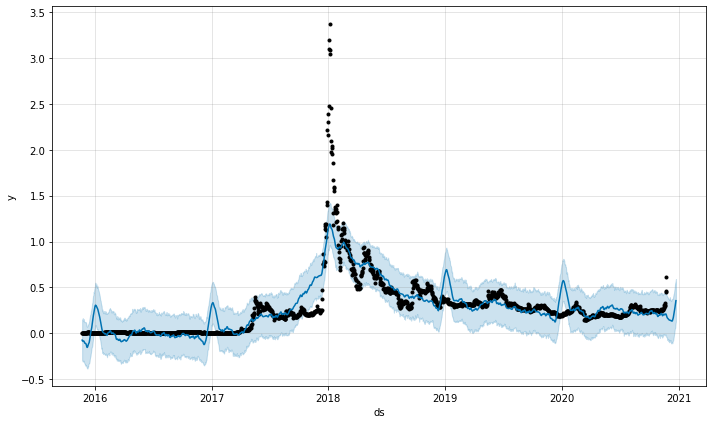

In [11]:
prophet_model.plot(forcast);

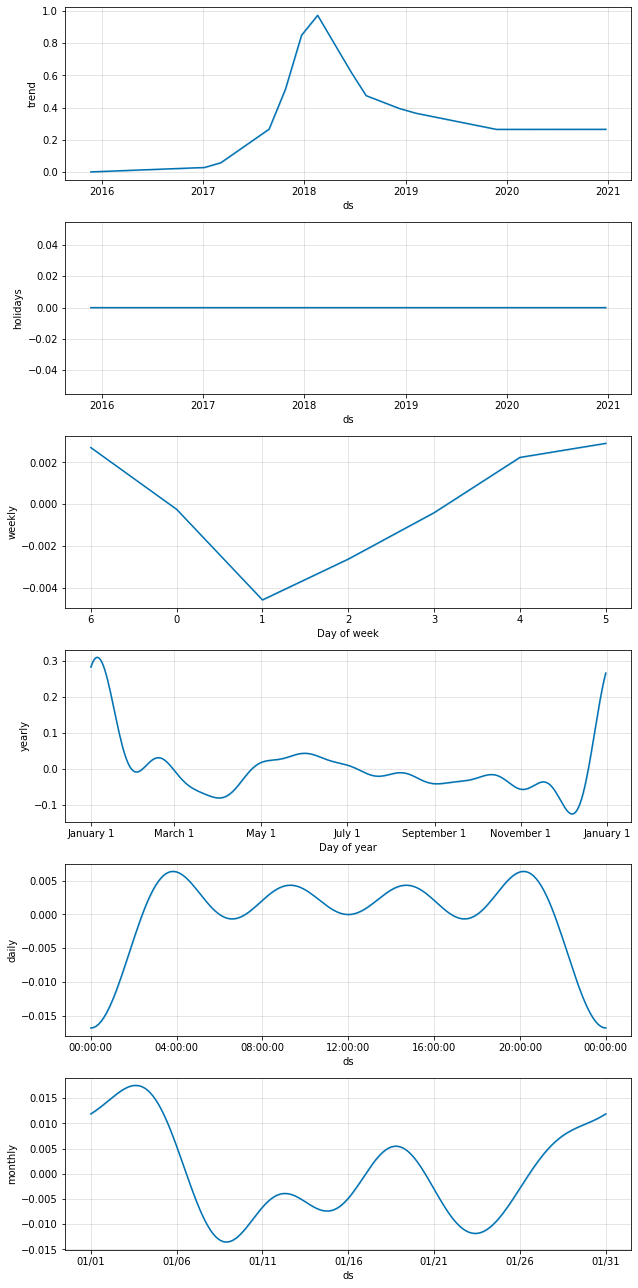

In [12]:

prophet_model.plot_components(forcast);

In [13]:
forcast.shape

(1858, 70)

In [14]:
forcast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1853,2020-12-19,0.254444,0.031334,0.492195
1854,2020-12-20,0.279684,0.054321,0.527672
1855,2020-12-21,0.304753,0.057584,0.549502
1856,2020-12-22,0.327888,0.106254,0.563879
1857,2020-12-23,0.354133,0.126673,0.589905


# Performance of the prediction

In [15]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(prophet_model, horizon='180 days')
df_cv.head()

INFO:fbprophet:Making 13 forecasts with cutoffs between 2017-06-12 00:00:00 and 2020-05-27 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-06-13,0.270028,0.242731,0.297246,0.266153,2017-06-12
1,2017-06-14,0.275758,0.248222,0.302077,0.278447,2017-06-12
2,2017-06-15,0.281402,0.254115,0.308799,0.259266,2017-06-12
3,2017-06-16,0.286034,0.260816,0.311430,0.262068,2017-06-12
4,2017-06-17,0.288627,0.261978,0.314216,0.268351,2017-06-12


In [16]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-06-13,0.270028,0.242731,0.297246,0.266153,2017-06-12
1,2017-06-14,0.275758,0.248222,0.302077,0.278447,2017-06-12
2,2017-06-15,0.281402,0.254115,0.308799,0.259266,2017-06-12
3,2017-06-16,0.286034,0.260816,0.311430,0.262068,2017-06-12
4,2017-06-17,0.288627,0.261978,0.314216,0.268351,2017-06-12
...,...,...,...,...,...,...
2335,2020-11-19,0.050112,-0.282096,0.364670,0.303766,2020-05-27
2336,2020-11-20,0.054193,-0.257359,0.348321,0.328068,2020-05-27
2337,2020-11-21,0.054952,-0.250821,0.372108,0.458344,2020-05-27
2338,2020-11-22,0.052802,-0.264826,0.365691,0.443700,2020-05-27


In [17]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,18 days,0.089249,0.298746,0.175858,0.352474,0.692308
1,19 days,0.099865,0.316015,0.188368,0.376144,0.670940
2,20 days,0.122132,0.349474,0.204842,0.401300,0.645299
3,21 days,0.143558,0.378891,0.220535,0.425968,0.628205
4,22 days,0.167589,0.409377,0.236671,0.450033,0.606838


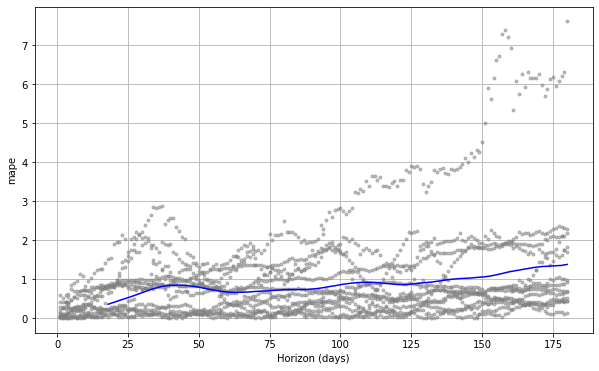

In [18]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')